In [1]:
import pandas as pd

In [2]:
carac = pd.read_csv("caract-2023.csv", sep=";", encoding="latin1")
usagers = pd.read_csv("usagers-2023.csv", sep=";", encoding="latin1")
vehicules = pd.read_csv("vehicules-2023.csv", sep=";", encoding="latin1")
carac.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202300000001,7,5,2023,06:00,1,75,75101,2,4,2,7,RUE DE RIVOLI,"48,86638600","2,32347100"
1,202300000002,7,5,2023,05:30,5,94,94080,2,1,3,6,Avenue de Paris,"48,84547782","2,42868146"
2,202300000003,7,5,2023,20:50,1,94,94022,2,3,2,1,Avenue du GÃ©nÃ©ral Leclerc,"48,76240000","2,40655000"
3,202300000004,6,5,2023,23:57,5,94,94078,2,1,3,5,Rue de Paris,"48,73248432","2,44687575"
4,202300000005,7,5,2023,00:50,5,94,94068,2,2,3,3,56bis Avenue Raspail,"48,78581000","2,49217000"


In [3]:
carac["date"] = pd.to_datetime(
    dict(year=carac["an"], month=carac["mois"], day=carac["jour"]),
    errors="coerce"
)

In [4]:
if "hrmn" in carac.columns:
        carac["heure"] = pd.to_datetime(
        carac["hrmn"].astype(str).str.zfill(4), format="%H%M", errors="coerce"
    ).dt.time
else:
    carac["heure"] = None


In [5]:
carac = carac[carac["date"].notna()]


In [6]:
conditions_dict = {
    1: "Temps normal", 2: "Pluie légère", 3: "Pluie forte", 4: "Neige",
    5: "Brouillard", 6: "Vent fort", 7: "Éblouissement", 8: "Temps couvert", 9: "Inconnu"
}


In [7]:
carac["conditions_meteo"] = carac["atm"].map(conditions_dict)

In [8]:
if "grav" in carac.columns:
    carac = carac[carac["grav"] >= 1]


In [9]:
merged = pd.merge(carac, usagers, on="Num_Acc", how="left")


In [10]:
final = pd.merge(merged, vehicules, on=["Num_Acc", "num_veh"], how="left")


In [11]:
print(carac[["an", "mois", "jour", "date"]].head())


     an  mois  jour       date
0  2023     5     7 2023-05-07
1  2023     5     7 2023-05-07
2  2023     5     7 2023-05-07
3  2023     5     6 2023-05-06
4  2023     5     7 2023-05-07


In [12]:
print("Dates manquantes :", carac["date"].isna().sum())


Dates manquantes : 0


In [13]:

print(carac["hrmn"].head())


0    06:00
1    05:30
2    20:50
3    23:57
4    00:50
Name: hrmn, dtype: object


In [14]:

print(carac[["atm", "conditions_meteo"]].drop_duplicates())




      atm conditions_meteo
0       2     Pluie légère
1       3      Pluie forte
8       8    Temps couvert
13      1     Temps normal
36      5       Brouillard
40      7    Éblouissement
457     9          Inconnu
1018    6        Vent fort
1548    4            Neige
6434   -1              NaN


In [15]:
print(final.head())
print(final.shape)


        Num_Acc  jour  mois    an   hrmn  lum dep    com  agg  int  ...  \
0  202300000001     7     5  2023  06:00    1  75  75101    2    4  ...   
1  202300000002     7     5  2023  05:30    5  94  94080    2    1  ...   
2  202300000002     7     5  2023  05:30    5  94  94080    2    1  ...   
3  202300000003     7     5  2023  20:50    1  94  94022    2    3  ...   
4  202300000003     7     5  2023  20:50    1  94  94022    2    3  ...   

   etatp  id_vehicule_y senc catv obs obsm choc manv motor occutc  
0     -1  155Â 680Â 557    1   30   0    0    5    1     1    NaN  
1     -1  155Â 680Â 556    2    7   0    1    1    1     1    NaN  
2      1  155Â 680Â 556    2    7   0    1    1    1     1    NaN  
3     -1  155Â 680Â 554    1    2   0    2    1   16     1    NaN  
4     -1  155Â 680Â 555    2    7   0    2    2   15     1    NaN  

[5 rows x 42 columns]
(125789, 42)


In [16]:
print("Nombre total d'accident different cette annee est de :",final["Num_Acc"].nunique())


Nombre total d'accident different cette annee est de : 54822


In [17]:
final["mois"] = final["date"].dt.month
final.groupby("mois")["Num_Acc"].nunique()


mois
1     4053
2     3682
3     3998
4     4162
5     4767
6     5452
7     4754
8     4121
9     5161
10    5389
11    4833
12    4450
Name: Num_Acc, dtype: int64

In [18]:
final.groupby("dep")["Num_Acc"].nunique().sort_values(ascending=False)


dep
75     4763
93     2650
92     2563
94     2204
13     2057
       ... 
90       37
978      30
986      10
977       7
975       2
Name: Num_Acc, Length: 107, dtype: int64

In [19]:
final["atm"].value_counts()
final["atm"].value_counts()


 1    98463
 2    14974
 8     5017
 3     3437
 7     2180
 5      509
 9      475
 6      432
 4      295
-1        7
Name: atm, dtype: int64

In [20]:
final["lum"].value_counts()


 1    82988
 5    19367
 3    13826
 2     8169
 4     1436
-1        3
Name: lum, dtype: int64

In [21]:
final["agg"].value_counts()


2    76061
1    49728
Name: agg, dtype: int64

In [22]:
import requests


date = "2022-05-01"
latitude = 48.8566    # Paris
longitude = 2.3522


url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={date}&end_date={date}&hourly=temperature_2m,precipitation,weathercode&timezone=Europe%2FParis"

response = requests.get(url)


if response.status_code == 200:
    data = response.json()
   
    heures = data["hourly"]["time"]
    temperatures = data["hourly"]["temperature_2m"]
    precipitations = data["hourly"]["precipitation"]

    for i in range(len(heures)):
        if "T12:00" in heures[i]:  # On cherche 12h
            print("Température à midi :", temperatures[i], "°C")
            print("Précipitation à midi :", precipitations[i], "mm")
            break
else:
    print("Erreur lors de l'appel à l'API météo")

Température à midi : 13.1 °C
Précipitation à midi : 0.0 mm


In [23]:
import pandas as pd
import requests
from tqdm import tqdm

# Extrait un sous-échantillon de 100 accidents
df_sample = final[["date", "lat", "long"]].dropna().head(100).copy()

# Créer les colonnes météo
df_sample["temp_max"] = None
df_sample["precip_mm"] = None

# Parcours de chaque ligne et appel API Open-Meteo
for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample)):
    date = row["date"].strftime("%Y-%m-%d")
    lat = row["lat"]
    lon = row["long"]

    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}"
        f"&start_date={date}&end_date={date}"
        f"&daily=temperature_2m_max,precipitation_sum"
        f"&timezone=Europe%2FParis"
    )

    try:
        response = requests.get(url)
        data = response.json()
        daily = data.get("daily", {})
        df_sample.at[idx, "temp_max"] = daily.get("temperature_2m_max", [None])[0]
        df_sample.at[idx, "precip_mm"] = daily.get("precipitation_sum", [None])[0]
    except Exception as e:
        print(f"Erreur pour l'index {idx} : {e}")


100%|█████████████████████████████████████████| 100/100 [00:13<00:00,  7.66it/s]


In [24]:
import requests
from tqdm import tqdm

# Sous-échantillon (5 accidents avec coordonnées valides)
df_test = final[["date", "lat", "long"]].dropna().head(50).copy()
df_test["temp_max"] = None
df_test["precip_mm"] = None

# Boucle API
for idx, row in tqdm(df_test.iterrows(), total=len(df_test)):
    date = row["date"].strftime("%Y-%m-%d")
    lat = row["lat"]
    lon = row["long"]

    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}"
        f"&start_date={date}&end_date={date}"
        f"&daily=temperature_2m_max,precipitation_sum"
        f"&timezone=Europe%2FParis"
    )

    try:
        response = requests.get(url)
        data = response.json()
        daily = data.get("daily", {})
        df_test.at[idx, "temp_max"] = daily.get("temperature_2m_max", [None])[0]
        df_test.at[idx, "precip_mm"] = daily.get("precipitation_sum", [None])[0]
    except Exception as e:
        print(f"Erreur ligne {idx} : {e}")

# Afficher le résultat
print(df_test)



100%|███████████████████████████████████████████| 50/50 [00:06<00:00,  7.58it/s]

         date          lat        long temp_max precip_mm
0  2023-05-07  48,86638600  2,32347100     None      None
1  2023-05-07  48,84547782  2,42868146     None      None
2  2023-05-07  48,84547782  2,42868146     None      None
3  2023-05-07  48,76240000  2,40655000     None      None
4  2023-05-07  48,76240000  2,40655000     None      None
5  2023-05-06  48,73248432  2,44687575     None      None
6  2023-05-06  48,73248432  2,44687575     None      None
7  2023-05-06  48,73248432  2,44687575     None      None
8  2023-05-06  48,73248432  2,44687575     None      None
9  2023-05-06  48,73248432  2,44687575     None      None
10 2023-05-07  48,78581000  2,49217000     None      None
11 2023-05-07  48,78581000  2,49217000     None      None
12 2023-05-07  48,83717000  2,51361000     None      None
13 2023-05-07  48,83717000  2,51361000     None      None
14 2023-05-07  48,78693219  2,36756095     None      None
15 2023-05-07  48,78693219  2,36756095     None      None
16 2023-05-07 

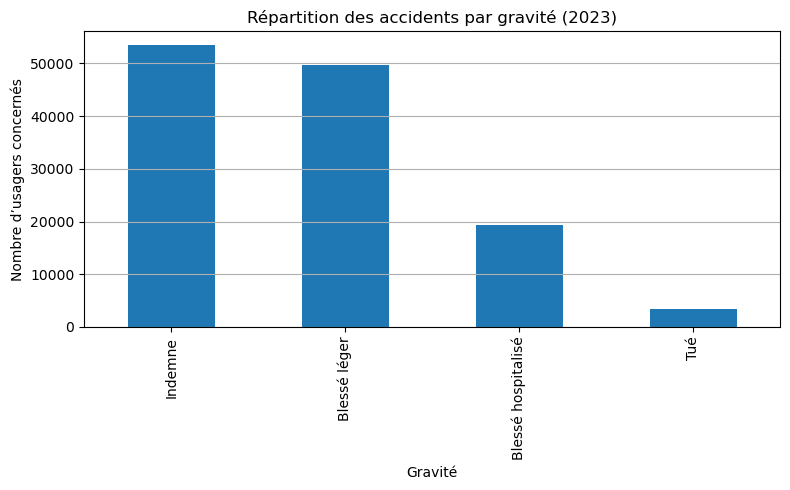

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


usagers = pd.read_csv("usagers-2023.csv", sep=';')


gravite_labels = {
    1: 'Indemne',
    2: 'Tué',
    3: 'Blessé hospitalisé',
    4: 'Blessé léger'
}


usagers['gravite'] = usagers['grav'].map(gravite_labels)


gravite_counts = usagers['gravite'].value_counts()


plt.figure(figsize=(8, 5))
gravite_counts.plot(kind='bar')
plt.title("Répartition des accidents par gravité (2023)")
plt.xlabel("Gravité")
plt.ylabel("Nombre d’usagers concernés")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


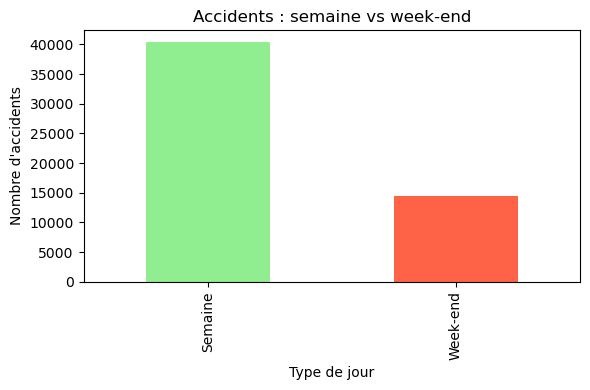

In [26]:
carac["date"] = pd.to_datetime(dict(year=carac["an"], month=carac["mois"], day=carac["jour"]), errors="coerce")
carac["jour_semaine"] = carac["date"].dt.dayofweek
carac["type_jour"] = carac["jour_semaine"].apply(lambda x: "Week-end" if x in [5, 6] else "Semaine")

# Bar chart
plt.figure(figsize=(6, 4))
carac["type_jour"].value_counts().plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title("Accidents : semaine vs week-end")
plt.xlabel("Type de jour")
plt.ylabel("Nombre d'accidents")
plt.tight_layout()
plt.show()


In [27]:
# Charger la population par département
pop_df = pd.read_csv("donnees_departements.csv", sep=";")



In [28]:

carac["dep"] = carac["dep"].astype(str).str.zfill(2)
pop_df["DEP"] = pop_df["DEP"].astype(str).str.zfill(2)
pop_clean = pop_df[["DEP", "PTOT"]].rename(columns={"DEP": "dep", "PTOT": "population"})


acc_per_dep = carac.groupby("dep").agg(accidents=("Num_Acc", "nunique")).reset_index()
acc_freq_habitant = acc_per_dep.merge(pop_clean, on="dep", how="left")
acc_freq_habitant["freq_per_10k_hab"] = acc_freq_habitant["accidents"] / acc_freq_habitant["population"] * 10000


vehicules["Num_Acc"] = vehicules["Num_Acc"].astype(str)
carac["Num_Acc"] = carac["Num_Acc"].astype(str)
veh_caract = pd.merge(vehicules, carac[["Num_Acc", "dep"]], on="Num_Acc", how="left")
veh_per_dep = veh_caract.groupby("dep").agg(vehicules=("Num_Acc", "count")).reset_index()
acc_freq_veh = acc_per_dep.merge(veh_per_dep, on="dep", how="left")
acc_freq_veh["freq_per_100_veh"] = acc_freq_veh["accidents"] / acc_freq_veh["vehicules"] * 100


usagers["Num_Acc"] = usagers["Num_Acc"].astype(str)
gravite = usagers.groupby("Num_Acc").agg(mean_grav=("grav", "mean")).reset_index()
gravite = gravite.merge(carac[["Num_Acc", "dep"]], on="Num_Acc", how="left")
grav_per_dep = gravite.groupby("dep").agg(mean_grav_dep=("mean_grav", "mean")).reset_index()


kpi_df = acc_freq_habitant.merge(acc_freq_veh[["dep", "freq_per_100_veh"]], on="dep", how="left")
kpi_df = kpi_df.merge(grav_per_dep, on="dep", how="left")


kpi_df.sort_values("freq_per_10k_hab", ascending=False).head(10)


,dep,accidents,population,freq_per_10k_hab,freq_per_100_veh,mean_grav_dep
75,75,4763,2129257.0,22.369305,58.434548,2.650365
98,973,600,290476.0,20.655751,55.504163,2.667480
29,2B,346,187843.0,18.419638,56.907895,2.689169
28,2A,286,168376.0,16.985794,56.972112,2.679670
93,93,2650,1688205.0,15.697146,55.162365,2.577442
94,94,2204,1428350.0,15.430392,55.003743,2.620886
92,92,2563,1663026.0,15.411665,57.376315,2.680699
97,972,546,364991.0,14.959273,55.828221,2.676242
96,971,558,388197.0,14.374145,58.185610,2.588385
4,05,201,145993.0,13.767783,62.229102,2.653068


In [31]:
# Hypothèses
average_cost_per_accident = 5000       # Coût moyen de base par accident (en euros)
average_premium_per_vehicle = 2000     # Prime annuelle fictive par véhicule (en euros)

# Fusionner le nombre de véhicules par département avec le tableau KPI
kpi_df_full = kpi_df.merge(veh_per_dep, on="dep", how="left")

# Calcul du coût total des sinistres par département :
# On multiplie le nombre d'accidents par le coût moyen ajusté par la gravité
kpi_df_full["total_accident_cost"] = kpi_df_full["accidents"] * average_cost_per_accident * kpi_df_full["mean_grav_dep"]

# Calcul total des primes collectées par département :
# On multiplie le nombre de véhicules par la prime fictive
kpi_df_full["total_premium"] = kpi_df_full["vehicules"] * average_premium_per_vehicle

# Calcul du ratio S/P (en pourcentage)
kpi_df_full["ratio_SP"] = kpi_df_full["total_accident_cost"] / kpi_df_full["total_premium"] * 100

# Affichage des 10 départements présentant le ratio S/P le plus élevé
print(kpi_df_full.sort_values("ratio_SP", ascending=False).head(10))


     dep  accidents  population  freq_per_10k_hab  freq_per_100_veh  \
100  975          2         NaN               NaN        100.000000   
55    55        111    185753.0          5.975677         68.098160   
104  986         10         NaN               NaN         76.923077   
48    48         70     80049.0          8.744644         74.468085   
65    65        218    237183.0          9.191215         67.912773   
90    90         37    142989.0          2.587612         72.549020   
46    46        125    181023.0          6.905200         69.060773   
58    58        193    207295.0          9.310403         66.095890   
3     04        193    171621.0         11.245710         67.719298   
87    87        422    378754.0         11.141797         63.554217   

     mean_grav_dep  vehicules  total_accident_cost  total_premium    ratio_SP  
100       2.250000          2         2.250000e+04           4000  562.500000  
55        2.874785        163         1.595506e+06        

In [37]:
lum_dict = {
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage non allumé",
    5: "Nuit avec éclairage allumé"
}

col_dict = {
    1: "Deux véhicules - frontale",
    2: "Deux véhicules - arrière",
    3: "Deux véhicules - angle",
    4: "Trois véhicules et plus",
    5: "Autre collision",
    6: "Piéton",
    7: "Obstacle fixe",
    8: "Animal",
    9: "Autre sans collision",
    10: "Non précisé"
}

agg_dict = {
    1: "Hors agglomération",
    2: "En agglomération"
}


grav_lum = usagers.groupby("Num_Acc").agg(mean_grav=("grav", "mean")).reset_index()
grav_lum = grav_lum.merge(carac[["Num_Acc", "lum"]], on="Num_Acc", how="left")
grav_lum = grav_lum.groupby("lum").agg(mean_grav=("mean_grav", "mean"), nb_acc=("Num_Acc", "count")).reset_index()
grav_lum["lum_lib"] = grav_lum["lum"].map(lum_dict)

grav_col = usagers.groupby("Num_Acc").agg(mean_grav=("grav", "mean")).reset_index()
grav_col = grav_col.merge(carac[["Num_Acc", "col"]], on="Num_Acc", how="left")
grav_col = grav_col.groupby("col").agg(mean_grav=("mean_grav", "mean"), nb_acc=("Num_Acc", "count")).reset_index()
grav_col["col_lib"] = grav_col["col"].map(col_dict)

veh_agg = pd.merge(vehicules, carac[["Num_Acc", "agg"]], on="Num_Acc", how="left")
agg_freq = veh_agg.groupby("agg").agg(
    accidents=("Num_Acc", "nunique"),
    vehicules=("Num_Acc", "count")
).reset_index()
agg_freq["freq_per_100_veh"] = agg_freq["accidents"] / agg_freq["vehicules"] * 100
agg_freq["zone"] = agg_freq["agg"].map(agg_dict)


In [38]:
display(grav_lum[["lum_lib", "mean_grav", "nb_acc"]].sort_values("mean_grav", ascending=False))
display(grav_col[["col_lib", "mean_grav", "nb_acc"]].sort_values("mean_grav", ascending=False))
display(agg_freq[["zone", "freq_per_100_veh", "accidents"]].sort_values("freq_per_100_veh", ascending=False))


,lum_lib,mean_grav,nb_acc
0,NaN,3.000000,2
3,Nuit sans éclairage public,2.756346,5913
4,Nuit avec éclairage non allumé,2.722728,649
5,Nuit avec éclairage allumé,2.669300,8498
2,Crépuscule ou aube,2.627293,3643
1,Plein jour,2.578144,36117


,col_lib,mean_grav,nb_acc
7,Obstacle fixe,3.253504,5198
0,NaN,3.047436,13
6,Piéton,2.729786,16625
1,Deux véhicules - frontale,2.612411,5873
2,Deux véhicules - arrière,2.471608,7269
3,Deux véhicules - angle,2.444168,16376
5,Autre collision,2.274899,1625
4,Trois véhicules et plus,2.211532,1843


,zone,freq_per_100_veh,accidents
1,En agglomération,60.174602,34326
0,Hors agglomération,56.090419,20496
